<a href="https://colab.research.google.com/github/PRATIK-HUB1/AI_Assignment-I/blob/main/2548392_PratikShah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# Core libraries for data analysis and visualization
import pandas as pd
import numpy as np

# Display settings for better readability
pd.set_option('display.max_columns', None)


In [21]:
# Load HDI dataset with correct encoding (fixes UnicodeDecodeError)
df = pd.read_csv(
    "/content/drive/MyDrive/Human_Development_Index_Dataset.csv",
    encoding="latin1"
)
# Display unique years in the dataset
df['year'].unique()


array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

Problem 1A – Task 1: Extract Latest Year

In [22]:
# Filter dataset for year 2022
hdi_2022_df = df[df['year'] == 2022].copy()


Problem 1A – Task 2: Data Exploration

In [23]:
# Display first 10 rows
hdi_2022_df.head(10)


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,59.766,10.705385,8.053257,13.228449,2.514790,1.174130,3.912740,1335.205733,395.915459,2256.217507,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,74.502,14.487470,14.681040,14.292200,10.121144,9.811468,10.433855,15293.326510,13198.539560,17398.003690,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,75.853,15.487880,16.264179,14.743880,6.987444,6.490568,7.481537,10978.405710,3841.656612,17858.790780,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
131,132,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,81.430,12.783780,12.765060,12.810630,11.613440,11.522590,11.704380,54233.449480,NaN,NaN,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,59.351,12.167600,11.535400,12.909900,5.844292,4.462809,7.187960,5327.788251,4696.356687,5973.845631,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568
197,198,ATG,Antigua and Barbuda,2022,0.826,79.236,0.093763,NaN,NaN,81.645,76.507,15.512328,16.746290,14.350537,10.546230,10.344223,10.595975,18783.965360,NaN,NaN,NaN,NaN,NaN,NaN,31.428571,68.571429,NaN,NaN,6.401056,NaN
230,231,ARG,Argentina,2022,0.849,76.064,45.510318,0.841405,0.845473,79.277,72.851,18.979509,20.914900,17.130329,11.144080,11.391660,10.857980,22047.971310,16933.062910,27264.830910,0.995,0.292,73.591541,71.648085,44.376900,55.623100,52.08,71.74,4.190779,14.4512
263,264,ARM,Armenia,2022,0.786,73.372,2.780469,0.795110,0.774942,78.447,67.866,14.405610,14.812910,14.022340,11.330300,11.321520,11.341190,15388.299760,13442.501330,17770.415300,1.026,0.198,96.001381,97.050957,35.514019,64.485981,62.80,71.84,2.531088,7.3553
296,297,AUS,Australia,2022,0.946,83.579,26.177414,0.934602,0.955941,85.453,81.708,21.080021,21.981430,20.193760,12.726820,12.810590,12.639710,49257.135200,41131.470850,57495.771580,0.978,0.063,94.580063,94.430069,44.493392,55.506608,62.31,71.13,14.914763,26.9245
329,330,AUT,Austria,2022,0.926,82.412,8.939617,0.911592,0.937756,84.600,80.150,16.367460,16.838499,15.922670,12.305714,12.048949,12.578872,56529.663290,41899.211240,71616.204300,0.972,0.048,100.000000,100.000000,40.983607,59.016393,56.55,66.69,7.399461,27.9621


In [24]:
# Rows and columns count
hdi_2022_df.shape




(206, 30)

In [25]:
# Column names and data types
hdi_2022_df.dtypes

,0
Unnamed: 0,int64
iso3,object
country,object
year,int64
hdi,float64
life_expectancy,float64
pop_millions,float64
hdi_f,float64
hdi_m,float64
life_expec_f,float64


Problem 1A – Task 3: Missing Values Inspection

In [26]:
# Check missing values in each column
hdi_2022_df.isnull().sum()

,0
Unnamed: 0,0
iso3,0
country,0
year,0
hdi,2
life_expectancy,0
pop_millions,0
hdi_f,13
hdi_m,13
life_expec_f,0


Problem 1A – Task 3: Data Cleaning

In [27]:
# Replace special missing symbols with NaN
hdi_2022_df.replace("–", np.nan, inplace=True)

# Convert key numeric columns to numeric type
num_cols = ['hdi', 'life expectancy', 'gross inc percap', 'gender development']
for col in num_cols:
    if col in hdi_2022_df.columns:
        hdi_2022_df[col] = pd.to_numeric(hdi_2022_df[col], errors='coerce')

# Remove duplicate rows
hdi_2022_df.drop_duplicates(inplace=True)

# Drop rows with missing HDI values
hdi_2022_df.dropna(subset=['hdi'], inplace=True)


Problem 1A – Task 4: HDI Statistics

In [28]:
# Mean, median, and standard deviation of HDI
hdi_2022_df['hdi'].agg(['mean', 'median', 'std'])


,hdi
mean,0.722887
median,0.739500
std,0.153029


Problem 1A – Task 4: Extremes Identification

In [29]:
# Country with highest HDI
hdi_2022_df.loc[hdi_2022_df['hdi'].idxmax()][['country', 'hdi']]


,5609
country,Switzerland
hdi,0.967


In [30]:
# Country with lowest HDI
hdi_2022_df.loc[hdi_2022_df['hdi'].idxmin()][['country', 'hdi']]


,5345
country,Somalia
hdi,0.38


Problem 1A – Task 5: Filtering and Sorting

In [31]:
# Filter countries with HDI greater than 0.800
high_hdi = hdi_2022_df[hdi_2022_df['hdi'] > 0.800]

# Sort by GNI per capita (descending) and display top 10
high_hdi.sort_values(
    by='gross_inc_percap',
    ascending=False
).head(10)[['country', 'hdi', 'gross_inc_percap']]


,country,hdi,gross_inc_percap
3332,Liechtenstein,0.942,146673.24150
4718,Qatar,0.875,95944.37754
5213,Singapore,0.949,88761.14559
2705,Ireland,0.950,87467.51391
3398,Luxembourg,0.927,78554.23640
6104,United Arab Emirates,0.937,74103.71494
5609,Switzerland,0.967,69432.78669
4322,Norway,0.966,69189.76165
6170,United States,0.927,65564.93798
2474,"Hong Kong, China (SAR)",0.956,62485.50516


Problem 1A – Task 6: HDI Classification

In [32]:
# Function to classify HDI based on UNDP thresholds
def hdi_category(hdi):
    if hdi < 0.550:
        return "Low"
    elif hdi < 0.700:
        return "Medium"
    elif hdi < 0.800:
        return "High"
    else:
        return "Very High"

# Apply classification
hdi_2022_df['HDI Category'] = hdi_2022_df['hdi'].apply(hdi_category)

# Verify classification
hdi_2022_df['HDI Category'].value_counts()

,count
HDI Category,
Very High,71
High,54
Medium,44
Low,35


Problem 1A – Task 6: Save Output File

In [33]:
# Save final dataframe with HDI category
hdi_2022_df.to_csv("HDI_category_added.csv", index=False)


PROBLEM 1B – HDI Visualization & Trend Analysis (2020–2022)

Task 1: Data Extraction and Saving

In [34]:
# Filter dataset for years 2020–2022
hdi_1b_df = df[df['year'].isin([2020, 2021, 2022])].copy()

# Save for Problem 1B
hdi_1b_df.to_csv("HDI_problem1B.csv", index=False)

# Quick check
hdi_1b_df['year'].value_counts().sort_index()


,count
year,
2020,206
2021,206
2022,206


Problem 1B – Task 2: Data Cleaning

In [35]:
# Check missing values in essential columns
hdi_1b_df[['country', 'year', 'hdi']].isnull().sum()


,0
country,0
year,0
hdi,8


In [36]:
# Remove duplicates and rows without HDI
hdi_1b_df.drop_duplicates(inplace=True)
hdi_1b_df.dropna(subset=['hdi'], inplace=True)


Problem 1B – Task 3A: Line Chart

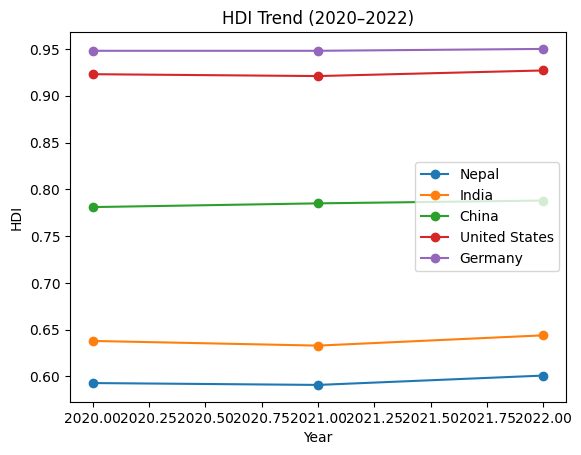

In [37]:
import matplotlib.pyplot as plt

# Select 5 countries
countries = ['Nepal', 'India', 'China', 'United States', 'Germany']
trend_df = hdi_1b_df[hdi_1b_df['country'].isin(countries)]

# Plot
plt.figure()
for c in countries:
    d = trend_df[trend_df['country'] == c]
    plt.plot(d['year'], d['hdi'], marker='o', label=c)

plt.xlabel("Year")
plt.ylabel("HDI")
plt.title("HDI Trend (2020–2022)")
plt.legend()
plt.savefig("HDI_Trend2020_2022.png")
plt.show()


Problem 1B – Task 2 (Region Creation)

In [38]:
# Create Region column

south_asia = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

middle_east = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

def assign_region(country):
    if country in south_asia:
        return "South Asia"
    elif country in middle_east:
        return "Middle East"
    else:
        return "Other Regions"

hdi_1b_df['region'] = hdi_1b_df['country'].apply(assign_region)

# Verify
hdi_1b_df['region'].value_counts()


,count
region,
Other Regions,553
Middle East,33
South Asia,24


In [39]:
# Create average HDI by region and year
avg_region = (
    hdi_1b_df
    .groupby(['region', 'year'])['hdi']
    .mean()
    .reset_index()
)

avg_region.head()


,region,year,hdi
0,Middle East,2020,0.787818
1,Middle East,2021,0.786909
2,Middle East,2022,0.792000
3,Other Regions,2020,0.720516
4,Other Regions,2021,0.719582


Problem 1B – Task 3B: Bar Chart — Average HDI by Region



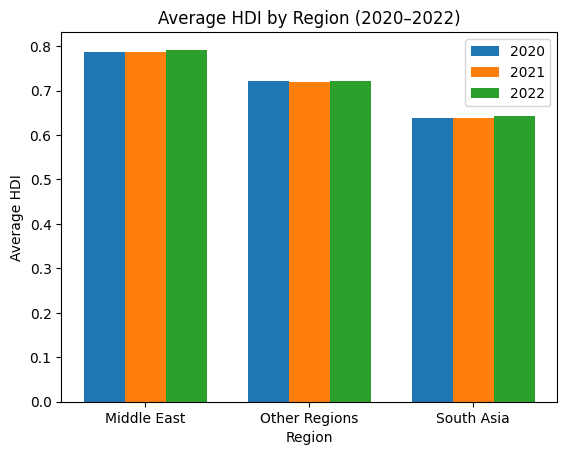

In [40]:
import numpy as np

regions = avg_region['region'].unique()
x = np.arange(len(regions))
width = 0.25

plt.figure()

for i, y in enumerate([2020, 2021, 2022]):
    d = avg_region[avg_region['year'] == y]
    plt.bar(x + i*width, d['hdi'], width, label=str(y))

plt.xticks(x + width, regions)
plt.xlabel("Region")
plt.ylabel("Average HDI")
plt.title("Average HDI by Region (2020–2022)")
plt.legend()
plt.savefig( "AverageHDIbyregion2020_2022" )

plt.show()


Problem 1B – Task 3B: Box Plot

<Figure size 640x480 with 0 Axes>

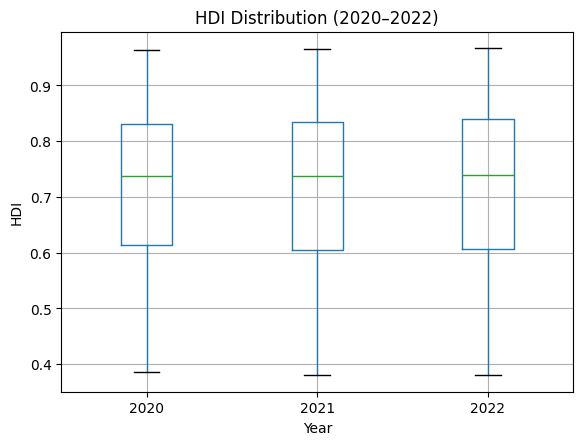

In [41]:
# Box plot for HDI distribution
plt.figure()
hdi_1b_df.boxplot(column='hdi', by='year')
plt.title("HDI Distribution (2020–2022)")
plt.suptitle("")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.savefig("HDI_Distribution2020_2022")
plt.show()


Problem 1B – Task 3B: Scatter Plot

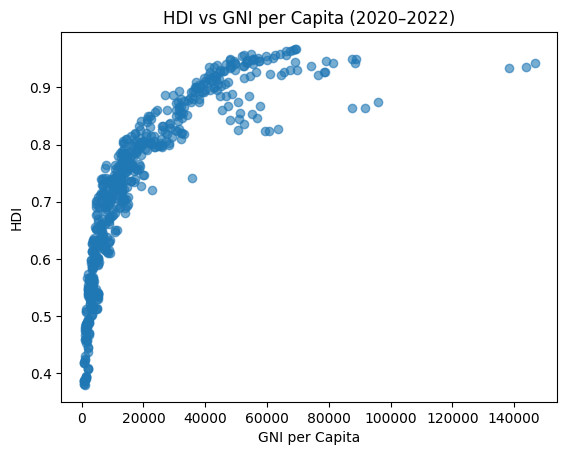

In [42]:
# Scatter plot: HDI vs GNI per capita
plt.figure()
plt.scatter(hdi_1b_df['gross_inc_percap'], hdi_1b_df['hdi'], alpha=0.6)
plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("HDI vs GNI per Capita (2020–2022)")
plt.savefig("HDI_vs_GNI_per_Capita_2020_2022")
plt.show()


Problem 1B – Task 4

In [43]:
# HDI change from 2020 to 2022 by country
hdi_change = (
    hdi_1b_df.pivot(index='country', columns='year', values='hdi')
    .assign(change=lambda x: x[2022] - x[2020])
    .sort_values('change', ascending=False)
)

# Top improvers and decliners
hdi_change.head(5), hdi_change.tail(5)

(year         2020   2021   2022  change
 country                                
 Andorra     0.843  0.855  0.884   0.041
 Azerbaijan  0.722  0.738  0.760   0.038
 Ecuador     0.734  0.746  0.765   0.031
 Maldives    0.737  0.753  0.762   0.025
 Mexico      0.757  0.757  0.781   0.024,
 year          2020   2021   2022  change
 country                                 
 Namibia      0.634  0.616  0.610  -0.024
 Afghanistan  0.488  0.473  0.462  -0.026
 Ukraine      0.762  0.755  0.734  -0.028
 Timor-Leste  0.633  0.574  0.566  -0.067
 Somalia        NaN    NaN  0.380     NaN)

PROBLEM 2 – Advanced HDI Exploration

Problem 2 – Task 1: South Asia Dataset

In [44]:
# Define South Asian countries
south_asia_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

# Filter dataset for South Asia
hdi_sa_df = df[df['country'].isin(south_asia_countries)].copy()

# Save South Asia dataset
hdi_sa_df.to_csv("HDI_SouthAsia.csv", index=False)

# Quick check
hdi_sa_df['country'].value_counts()


,count
country,
Afghanistan,33
Bangladesh,33
Bhutan,33
India,33
Maldives,33
Nepal,33
Pakistan,33
Sri Lanka,33


Problem 2 – Task 2: Composite Score

In [45]:
# Create Composite Score
hdi_sa_df['Composite Score'] = (
    0.30 * hdi_sa_df['life_expectancy'] +
    0.30 * hdi_sa_df['gross_inc_percap']
)


Problem 2 – Task 2 (Ranking)

In [46]:
# Rank South Asian countries by Composite Score (latest year)
sa_latest = hdi_sa_df[hdi_sa_df['year'] == 2022]

sa_rank = sa_latest[['country', 'hdi', 'Composite Score']] \
    .sort_values('Composite Score', ascending=False)

sa_rank


,country,hdi,Composite Score
3530,Maldives,0.762,5678.289357
5477,Sri Lanka,0.780,3592.832541
659,Bhutan,0.681,3209.130864
2573,India,0.644,2105.481239
461,Bangladesh,0.670,1975.446053
4388,Pakistan,0.540,1632.210427
4091,Nepal,0.601,1228.811605
32,Afghanistan,0.462,419.425420


Problem 2 – Task 2 (Visualization)

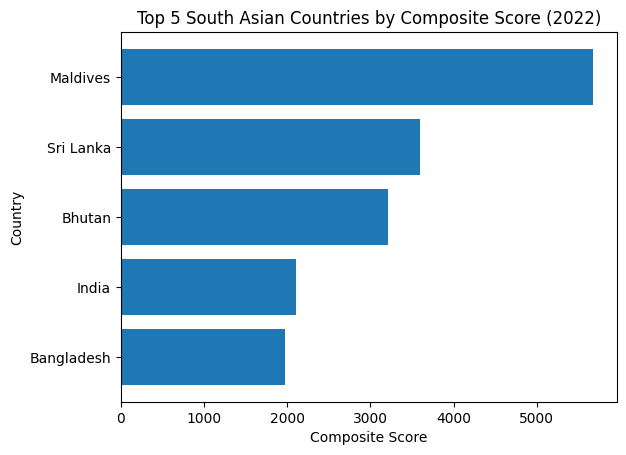

In [47]:
# Top 5 countries by Composite Score
top5 = sa_rank.head(5)

plt.figure()
plt.barh(top5['country'], top5['Composite Score'])
plt.xlabel("Composite Score")
plt.ylabel("Country")
plt.title("Top 5 South Asian Countries by Composite Score (2022)")
plt.gca().invert_yaxis()
plt.savefig("Top5SouthAsianCountriesbyCompositeScore2022")
plt.show()


Problem 2 – Task 3: Outlier Detection

In [48]:
# IQR method for HDI
Q1 = sa_latest['hdi'].quantile(0.25)
Q3 = sa_latest['hdi'].quantile(0.75)
IQR = Q3 - Q1

outliers = sa_latest[
    (sa_latest['hdi'] < Q1 - 1.5 * IQR) |
    (sa_latest['hdi'] > Q3 + 1.5 * IQR)
]

outliers[['country', 'hdi']]


,country,hdi


Problem 2 – Task 3 (Scatter Plot)

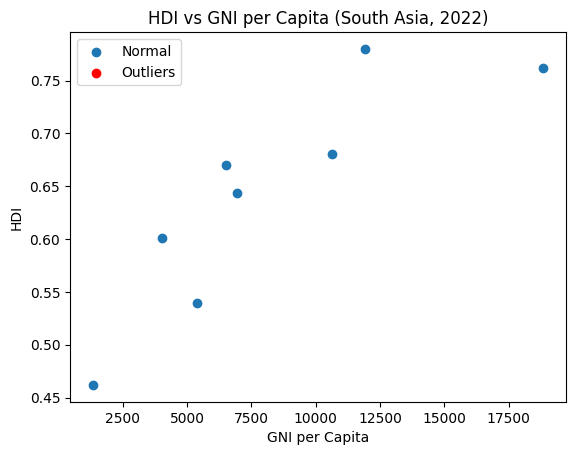

In [49]:
plt.figure()
plt.scatter(sa_latest['gross_inc_percap'], sa_latest['hdi'], label="Normal")
plt.scatter(outliers['gross_inc_percap'], outliers['hdi'], color='red', label="Outliers")
plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("HDI vs GNI per Capita (South Asia, 2022)")
plt.legend()
plt.savefig("HDI_vs_GNI_per_Capita_Outliers_2022")
plt.show()


Problem 2 – Task 4: Correlation Analysis

In [50]:
# Pearson correlation with HDI
corr_life = sa_latest['hdi'].corr(sa_latest['life_expectancy'])
corr_gender = sa_latest['hdi'].corr(sa_latest['gender_development'])

corr_life, corr_gender


(np.float64(0.9281974040239386), np.float64(0.8847595354487648))

Problem 2 – Task 4 (Visualization)

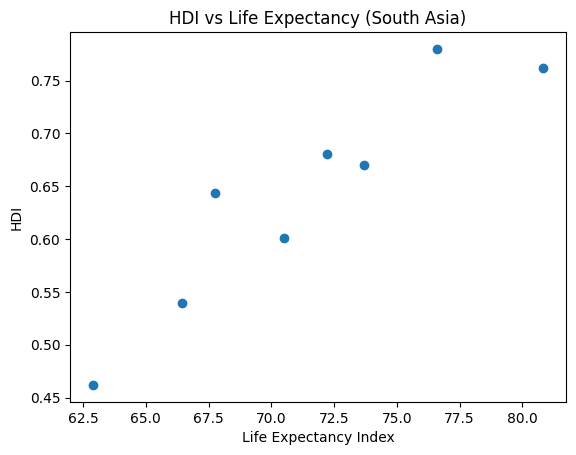

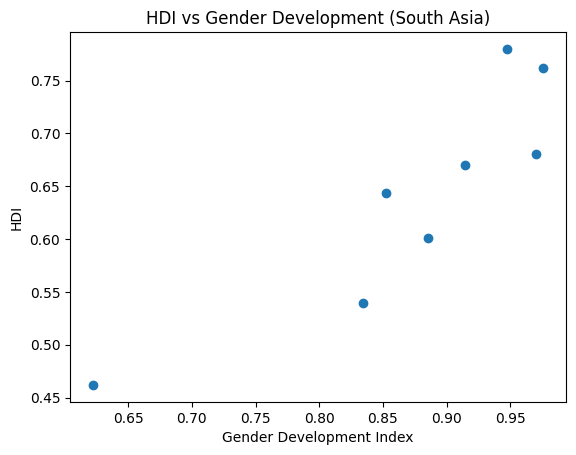

In [51]:
# HDI vs Life Expectancy
plt.figure()
plt.scatter(sa_latest['life_expectancy'], sa_latest['hdi'])
plt.xlabel("Life Expectancy Index")
plt.ylabel("HDI")
plt.title("HDI vs Life Expectancy (South Asia)")
plt.savefig("HDI_vs_Life_Expectancy_2022")
plt.show()

# HDI vs Gender Development
plt.figure()
plt.scatter(sa_latest['gender_development'], sa_latest['hdi'])
plt.xlabel("Gender Development Index")
plt.ylabel("HDI")
plt.title("HDI vs Gender Development (South Asia)")
plt.savefig("HDI_vs_Gender_DEvelopment_2022")
plt.show()


Problem 2 – Task 5: Gap Analysis

In [52]:
# Create GNI–HDI Gap
sa_latest['GNI_HDI_Gap'] = sa_latest['gross_inc_percap'] - sa_latest['hdi']

# Sort gaps
sa_gap_sorted = sa_latest[['country', 'GNI_HDI_Gap']] \
    .sort_values('GNI_HDI_Gap', ascending=False)

# Top positive and negative gaps
sa_gap_sorted.head(3), sa_gap_sorted.tail(3)


/tmp/ipython-input-2290693186.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sa_latest['GNI_HDI_Gap'] = sa_latest['gross_inc_percap'] - sa_latest['hdi']


(        country  GNI_HDI_Gap
 3530   Maldives  18846.03019
 5477  Sri Lanka  11898.71847
 659      Bhutan  10624.19288,
           country  GNI_HDI_Gap
 4388     Pakistan  5373.730423
 4091        Nepal  4024.953685
 32    Afghanistan  1334.743733)

Problem 2 – Task 5 (Bar Chart)

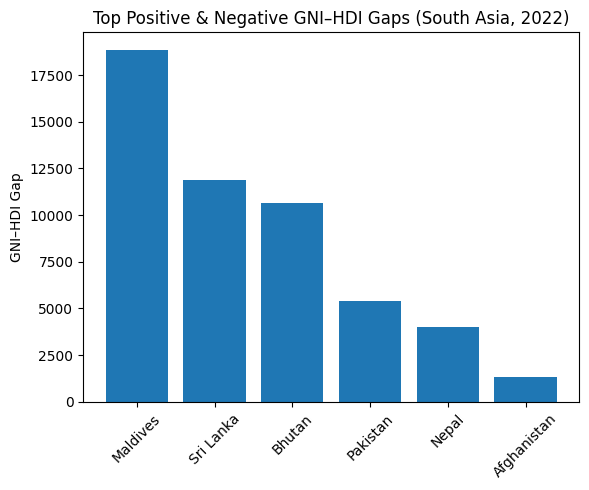

In [53]:
gap_plot = pd.concat([
    sa_gap_sorted.head(3),
    sa_gap_sorted.tail(3)
])

plt.figure()
plt.bar(gap_plot['country'], gap_plot['GNI_HDI_Gap'])
plt.xticks(rotation=45)
plt.ylabel("GNI–HDI Gap")
plt.title("Top Positive & Negative GNI–HDI Gaps (South Asia, 2022)")
plt.savefig("TopPositiveNegativeGNIHDIGaps2022")
plt.show()


PROBLEM 3 – South Asia vs Middle East (2020–2022)

Problem 3 – Task 1 — Create Regional Subsets & Save CSVs



In [54]:
# Define regions
south_asia = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

middle_east = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

# Filter datasets
sa_3_df = hdi_1b_df[hdi_1b_df['country'].isin(south_asia)].copy()
me_3_df = hdi_1b_df[hdi_1b_df['country'].isin(middle_east)].copy()

# Save CSVs (mandatory)
sa_3_df.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)
me_3_df.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)

# Quick check
sa_3_df['country'].nunique(), me_3_df['country'].nunique()


(8, 11)

Problem 3 – Task 2— Descriptive Statistics (Mean & Std)

In [55]:
# Mean and standard deviation of HDI
sa_stats = sa_3_df['hdi'].agg(['mean', 'std'])
me_stats = me_3_df['hdi'].agg(['mean', 'std'])

sa_stats, me_stats


(mean    0.639583
 std     0.098273
 Name: hdi, dtype: float64,
 mean    0.788909
 std     0.141295
 Name: hdi, dtype: float64)

Problem 3 – Task 3 — Top & Bottom Performers

In [56]:
# Average HDI by country (2020–2022)
sa_avg = sa_3_df.groupby('country')['hdi'].mean().sort_values(ascending=False)
me_avg = me_3_df.groupby('country')['hdi'].mean().sort_values(ascending=False)

# Top 3 and Bottom 3
sa_top_bottom = pd.concat([sa_avg.head(3), sa_avg.tail(3)])
me_top_bottom = pd.concat([me_avg.head(3), me_avg.tail(3)])

sa_top_bottom, me_top_bottom


(country
 Sri Lanka      0.780000
 Maldives       0.750667
 Bhutan         0.677667
 Nepal          0.595000
 Pakistan       0.537667
 Afghanistan    0.474333
 Name: hdi, dtype: float64,
 country
 United Arab Emirates    0.932667
 Israel                  0.910667
 Bahrain                 0.885333
 Lebanon                 0.730000
 Iraq                    0.667000
 Yemen                   0.426333
 Name: hdi, dtype: float64)

Problem 3 – Task 3 (Visualization)

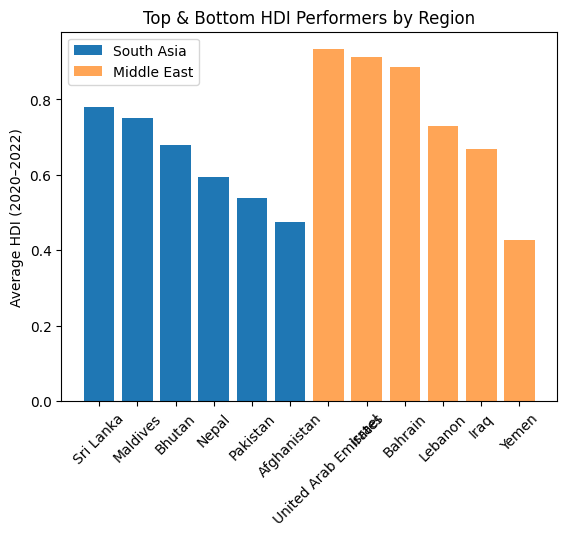

In [57]:
plt.figure()
plt.bar(sa_top_bottom.index, sa_top_bottom.values, label="South Asia")
plt.bar(me_top_bottom.index, me_top_bottom.values, label="Middle East", alpha=0.7)
plt.xticks(rotation=45)
plt.ylabel("Average HDI (2020–2022)")
plt.title("Top & Bottom HDI Performers by Region")
plt.legend()
plt.savefig("TopBottomHDI2020_2022")
plt.show()


Problem 3 – Task 4 (Gender Development)

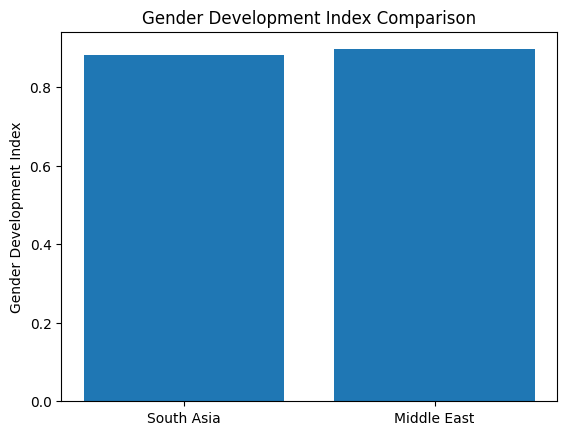

In [58]:
# Average Gender Development Index
sa_gdi = sa_3_df['gender_development'].mean()
me_gdi = me_3_df['gender_development'].mean()

plt.figure()
plt.bar(['South Asia', 'Middle East'], [sa_gdi, me_gdi])
plt.ylabel("Gender Development Index")
plt.title("Gender Development Index Comparison")
plt.savefig("GenderDevelopmentIndexComparison")
plt.show()


Problem 3 – Task 4 (Life Expectancy)

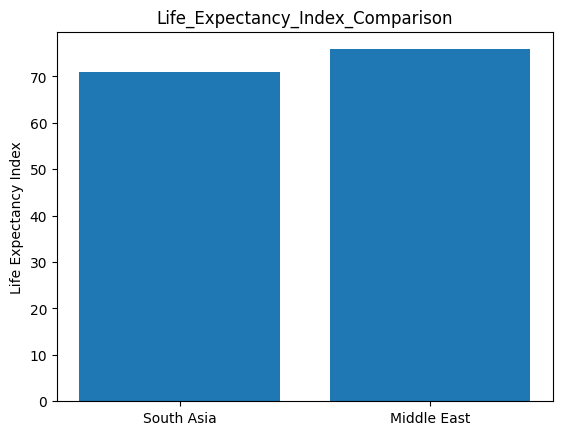

In [59]:
# Average Life Expectancy Index
sa_life = sa_3_df['life_expectancy'].mean()
me_life = me_3_df['life_expectancy'].mean()

plt.figure()
plt.bar(['South Asia', 'Middle East'], [sa_life, me_life])
plt.ylabel("Life Expectancy Index")
plt.title("Life_Expectancy_Index_Comparison")
plt.savefig("LifeExpectancyIndexComparison")
plt.show()


Problem 3 – Task 4 (GNI per Capita)

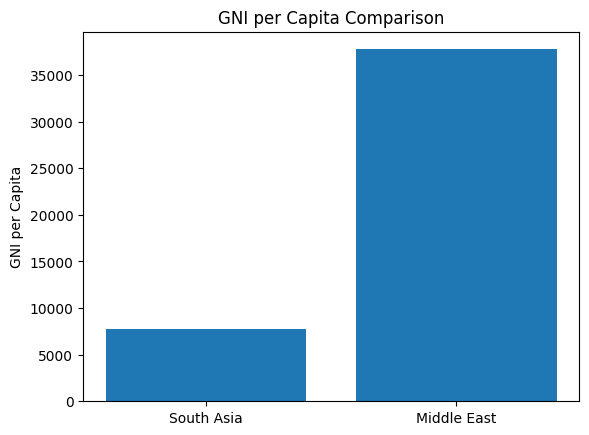

In [60]:
# Average GNI per Capita
sa_gni = sa_3_df['gross_inc_percap'].mean()
me_gni = me_3_df['gross_inc_percap'].mean()

plt.figure()
plt.bar(['South Asia', 'Middle East'], [sa_gni, me_gni])
plt.ylabel("GNI per Capita")
plt.title("GNI per Capita Comparison")
plt.savefig("GNIperCapitaComparison")
plt.show()


Problem 3 – Task 5

In [61]:
# Range
sa_range = sa_3_df['hdi'].max() - sa_3_df['hdi'].min()
me_range = me_3_df['hdi'].max() - me_3_df['hdi'].min()

# Coefficient of Variation
sa_cv = sa_3_df['hdi'].std() / sa_3_df['hdi'].mean()
me_cv = me_3_df['hdi'].std() / me_3_df['hdi'].mean()

sa_range, me_range, sa_cv, me_cv


(0.321,
 0.5130000000000001,
 np.float64(0.1536520924690084),
 np.float64(0.17910145193048382))

Problem 3 – Task 6

In [62]:
# Correlations with HDI
sa_corr = sa_3_df[['hdi', 'gender_development', 'life_expectancy']].corr()
me_corr = me_3_df[['hdi', 'gender_development', 'life_expectancy']].corr()

sa_corr, me_corr


(                         hdi  gender_development  life_expectancy
 hdi                 1.000000            0.874218         0.938764
 gender_development  0.874218            1.000000         0.853780
 life_expectancy     0.938764            0.853780         1.000000,
                          hdi  gender_development  life_expectancy
 hdi                 1.000000            0.935670         0.933123
 gender_development  0.935670            1.000000         0.912836
 life_expectancy     0.933123            0.912836         1.000000)

Problem 3 – Task 6 (Visualization)

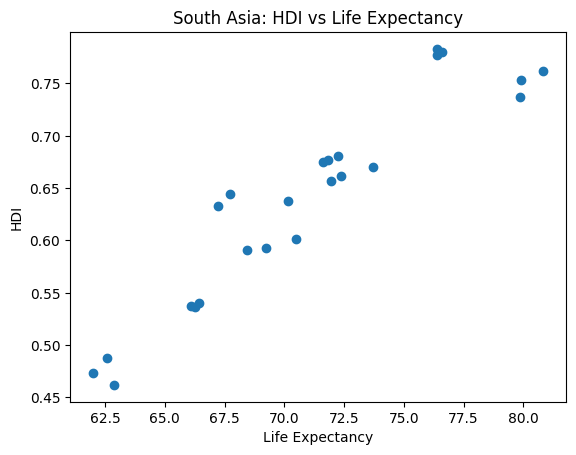

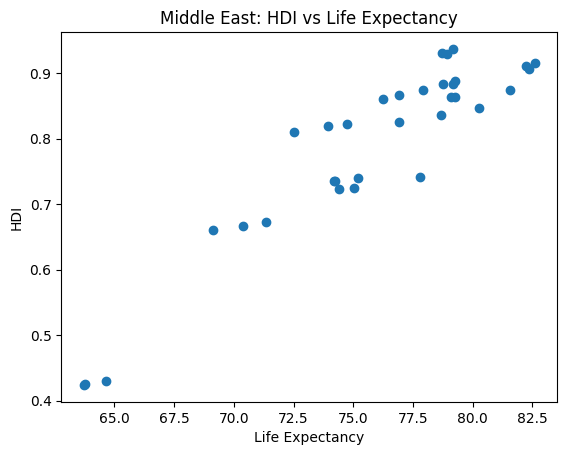

In [63]:
# South Asia
plt.figure()
plt.scatter(sa_3_df['life_expectancy'], sa_3_df['hdi'])
plt.xlabel("Life Expectancy")
plt.ylabel("HDI")
plt.title("South Asia: HDI vs Life Expectancy")
plt.savefig("South_Asia_HDI_vs_life_expectancy_2020_2022")
plt.show()

# Middle East
plt.figure()
plt.scatter(me_3_df['life_expectancy'], me_3_df['hdi'])
plt.xlabel("Life Expectancy")
plt.ylabel("HDI")
plt.title("Middle East: HDI vs Life Expectancy")
plt.savefig("HDI_vs_life_expectancy_2020_2022")
plt.show()


Problem 3 – Task 7

In [64]:
def iqr_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]

sa_out = iqr_outliers(sa_3_df, 'hdi')
me_out = iqr_outliers(me_3_df, 'hdi')

sa_out[['country', 'hdi']], me_out[['country', 'hdi']]


(Empty DataFrame
 Columns: [country, hdi]
 Index: [],
      country    hdi
 6366   Yemen  0.430
 6367   Yemen  0.425
 6368   Yemen  0.424)

Problem 3, Task 7 (GNI Outliers)

In [65]:
# GNI per Capita outliers using IQR
sa_gni_out = iqr_outliers(sa_3_df, 'gross_inc_percap')
me_gni_out = iqr_outliers(me_3_df, 'gross_inc_percap')

sa_gni_out[['country', 'gross_inc_percap']], me_gni_out[['country', 'gross_inc_percap']]


(Empty DataFrame
 Columns: [country, gross_inc_percap]
 Index: [],
 Empty DataFrame
 Columns: [country, gross_inc_percap]
 Index: [])